# Course : Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning
## Week 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

### 1.1 The 'Hello World' of Neural Networks :

In [4]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xData = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
yData = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xData, yData, epochs=500)

print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 171ms/step - loss: 11.6421
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 9.3804
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 7.5964
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 6.1884
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 5.0764
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 4.1972
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 3.5013
Epoch 8/500
1/1 [==============================] - 0s 0s/step - loss: 2.9497
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 2.5117
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 2.1633
Epoch 11/500
1/1 [==============================] - 0s 994us/step - loss: 1.8852
Epoch 12/500
1/1 [==============================] - 0s 0s/step - loss: 1.6627
Epoch 13/500
1/1 [==============================] - 0s 1ms

## Week 2

### 2.1 Introduction to Computer Vision

#### We will be using the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labes) = fashion_mnist.load_data()

In [3]:
labels = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

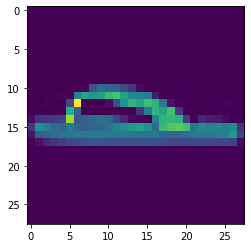

In [4]:
np.set_printoptions(linewidth=320)

print(train_images[23324])
plt.imshow(train_images[23324])

1 Trouser


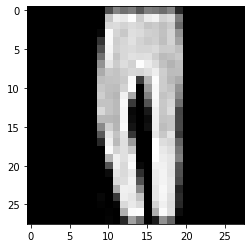

In [5]:
plt.imshow(train_images[49840], cmap='gray')
print(train_labels[49840], labels[train_labels[49840]])

6 Shirt


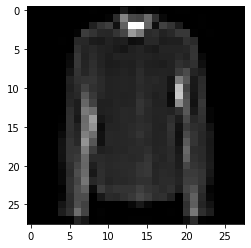

In [6]:
plt.imshow(train_images[49440], cmap='gray')
print(train_labels[49440], labels[train_labels[49440]])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```Python
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [13]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2
